<a href="https://colab.research.google.com/github/alicepearse/DL_prac/blob/master/MNIST10_update.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model

import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255, x_test / 255
y_train, y_test = y_train.flatten(), y_test.flatten()
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)

170500096/170498071 [==============================] - 4s 0us/step
x_train shape: (50000, 32, 32, 3)
y_train shape: (50000,)


In [3]:
# set classes
K = len(set(y_train))
print("Number classes:", K)

Number classes: 10


In [4]:
# Build the model using the functional API
i = Input(shape = x_train[0].shape)
# x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
# x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
# x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [5]:
# compile and fit
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size
r = model.fit(train_generator, validation_data=(x_test, y_test), steps_per_epoch=steps_per_epoch, epochs=50)

Epoch 1/50
1562/1562 [==============================] - 28s 18ms/step - loss: 1.5268 - accuracy: 0.4717 - val_loss: 1.2858 - val_accuracy: 0.5573
Epoch 2/50
1562/1562 [==============================] - 27s 17ms/step - loss: 1.0753 - accuracy: 0.6245 - val_loss: 0.9170 - val_accuracy: 0.6879
Epoch 3/50
1562/1562 [==============================] - 27s 17ms/step - loss: 0.9160 - accuracy: 0.6841 - val_loss: 0.8629 - val_accuracy: 0.7033
Epoch 4/50
1562/1562 [==============================] - 27s 17ms/step - loss: 0.8234 - accuracy: 0.7186 - val_loss: 0.8527 - val_accuracy: 0.7183
Epoch 5/50
1562/1562 [==============================] - 27s 17ms/step - loss: 0.7565 - accuracy: 0.7431 - val_loss: 0.8401 - val_accuracy: 0.7109
Epoch 6/50
1562/1562 [==============================] - 26s 17ms/step - loss: 0.7013 - accuracy: 0.7609 - val_loss: 0.6900 - val_accuracy: 0.7706
Epoch 7/50
1562/1562 [==============================] - 26s 17ms/step - loss: 0.6580 - accuracy: 0.7750 - val_loss: 0.6173 -

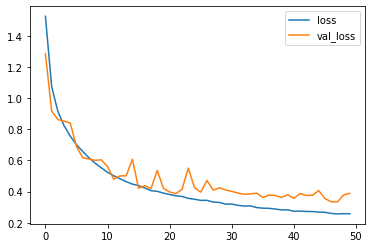

In [6]:
# plot loss per iteration
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

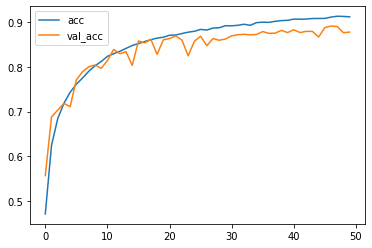

In [7]:
# plot accuracy per iteration
plt.plot(r.history['accuracy'], label = 'acc')
plt.plot(r.history['val_accuracy'], label = 'val_acc')
plt.legend()

Confusion Matrix, without normalization
[[899   8  18  10   2   2   8   5  31  17]
 [  3 944   2   1   0   0   1   1   2  46]
 [ 31   0 762  52  32  17  83  12   5   6]
 [ 12   3  15 794  32  43  66  16   7  12]
 [ 10   0  11  26 863   7  67  14   1   1]
 [  4   2   8 157  19 745  38  19   2   6]
 [  2   3   5  22   2   3 959   1   1   2]
 [  6   0   5  26  15   8  10 924   1   5]
 [ 24  18   3   7   0   0   2   2 925  19]
 [  6  21   1   4   0   0   1   2   6 959]]


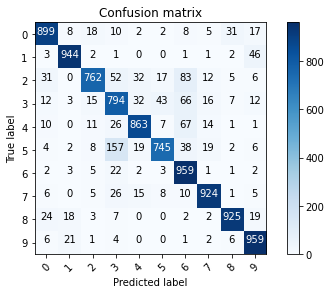

In [8]:
# plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title="Confusion matrix",
                          cmap=plt.cm.Blues):
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized Confusion Matrix")
  else:
    print("Confusion Matrix, without normalization")

  print(cm)

  plt.imshow(cm, interpolation="nearest", cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)
  
  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment='center',
             color = 'white' if cm[i, j] > thresh else 'black')
  
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel("Predicted label")


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [9]:
#label mapping
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

Text(0.5, 1.0, 'True label: bird Predicted: airplane')

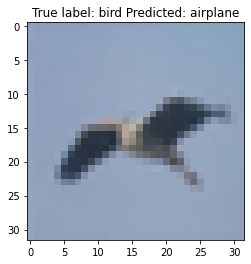

In [10]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]))